In [1]:
print('hello_go_hard')

hello_go_hard


In [2]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('user_actions.csv')


In [3]:
dates = data[['actionId']]
list_of_dates = dates['actionId'].tolist()
set_of_actions = set(list_of_dates)
count_dict = {}
for elem in set_of_actions:
    count_dict[elem] = list_of_dates.count(elem)


In [4]:
import re

messages = data['message'].tolist()
condition = []
operation_func = []
input_data = []
num_success = []
num_failed = []
num_warning = []
for message in messages:
    message = message.replace(':','')
    message = message[1:-1].split('] [')
    clear_data = []
    for dirt in message:
        if ', ' in dirt:
            clear_data += dirt.split(', ')
        else:
            clear_data.append(dirt)
    condition.append(clear_data[0])
    operation_func.append(clear_data[1])
    if len(clear_data) == 3:
        if str(clear_data[2].split('=')[1]).isdigit():
            input_data.append(int(clear_data[2].split('=')[1]))
        else:
            input_data.append(clear_data[2].split('=')[1])
        num_success.append(0)
        num_failed.append(0)
        num_warning.append(0)
    else:
        input_data.append(0)
        num_success.append(int(clear_data[2].split('=')[1]))
        num_failed.append(int(clear_data[3].split('=')[1]))
        num_warning.append(int(clear_data[4].split('=')[1]))
data["Condition"] = condition
data["Operation"] = operation_func
data["Input"] = input_data
data["Success"] = num_success
data["Failed"] = num_failed
data["Warning"] = num_warning
print(data.columns.values.tolist())

['actionId', 'currentUser', 'createdDateTime', 'message', 'Condition', 'Operation', 'Input', 'Success', 'Failed', 'Warning']


In [5]:
#Данные, которые не могут быть обработаны
selected = data[['actionId']]
list_action = selected['actionId'].tolist()
set_actions = set(list_action)
list_for_remove = []
for action in set_actions:
    if list_action.count(action) != 2:
        list_for_remove.append(action)
for action in list_for_remove:
    set_actions.remove(action)
print(len(list_for_remove))
print(list_for_remove)
    


935
['11980380-dbb6-47aa-a80e-a491a7cac41d', '9de90701-74e8-4d9a-a969-59ed06bd7a78', '0282cb45-a71a-445f-82ac-766637f143c8', '11061d63-200e-4085-b301-4077d24d2b49', 'b345e7ae-3906-45b4-bf1f-d94e76a5e2f5', 'c5ff7ef1-4137-4c9b-9764-e3a1f1eb8d5c', 'effcd81d-23e7-4377-8d0e-1771fdb2e1ae', '5489e16f-b980-445c-932d-b6e22e0d6151', '09b82b6f-7943-409b-829a-8e65309ce201', 'fe6fcf5e-29c7-484d-a63c-7aa6f1b777a1', 'f6791990-1a6b-48d2-8892-b19ba16f44bb', '7a192643-aed7-48f5-aa68-24793c5df64d', '676df3c2-f787-40f4-af22-32c52e676850', 'b048fc5a-8bff-4c0c-97cd-e2e7f25889f5', '12f06df0-59c7-4a00-aecf-e3998461352d', '17780741-6d06-481c-ae31-370b59f4e313', '59a7ac89-e1ec-4dff-961e-820a7f567f28', '2468c577-54b8-4df2-a142-b8aeb6bdc655', 'd6336dfe-fa83-44ad-8239-94825c7b16df', '71dae775-bca1-4e8d-86f8-897bf08768ac', '11d75e9e-363f-4bf9-a8ec-21303e0cf1b2', '8b2d39de-99c4-47fe-82e8-7e6543925eeb', '85966093-6968-4617-a997-f3709404eada', '8a928192-48aa-4cd5-9952-508d44a7dde0', '123bd091-384a-4d18-b738-803a448df7

['actionId', 'currentUser', 'createdDateTime', 'message', 'Condition', 'Operation', 'Input', 'Success', 'Failed', 'Warning']


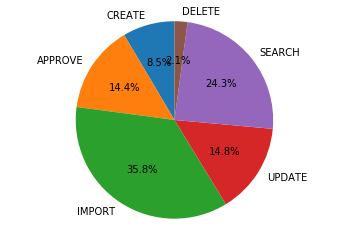

In [7]:
#Процентное соотношение операций (круговая диаграмма)
import matplotlib.pyplot as plt

print(data.columns.values.tolist())

operations = data['Operation']
operations_list = operations.tolist()
set_of_operations = set(operations_list)
count_operation = {}
for operation in set_of_operations:
    count_operation[operation] = operations_list.count(operation)

labels = list(count_operation.keys())
sizes = list(count_operation.values())

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')
plt.show()

In [8]:
#Общее количество операций по неделям
series_of_dates = pd.to_datetime(data['createdDateTime'])
list_of_dates = series_of_dates.tolist()
list_of_weeks = [date.week for date in list_of_dates]
set_of_weeks = set(list_of_weeks)
dict_count_weeks = {}
for week in set_of_weeks:
    dict_count_weeks[week] = list_of_weeks.count(week)
print(dict_count_weeks)

{1: 398, 2: 345, 3: 371, 4: 369, 5: 362, 6: 323, 7: 371, 8: 405, 9: 347, 10: 361, 11: 365, 12: 331, 13: 381, 14: 386, 15: 368, 16: 373, 17: 390, 18: 388, 19: 374, 20: 359, 21: 421, 22: 388, 23: 393, 24: 397, 25: 344, 26: 338, 27: 417, 28: 362, 29: 371, 30: 351, 31: 334, 32: 345, 33: 327, 34: 346, 35: 402, 36: 337, 37: 337, 38: 348, 39: 386, 40: 386, 41: 373, 42: 341, 43: 352, 44: 333, 45: 357, 46: 374, 47: 319, 48: 391, 49: 431, 50: 360, 51: 341, 52: 326}


In [9]:
#Для операций поиска - топ-10 наиболее длительных операций с указанием затраченного времени
set_of_actionid = set(data['actionId'].loc[data['Operation'] == 'SEARCH'].tolist())
actions_duration_list = []
for action in set_of_actionid:
    selected_rows = data[['createdDateTime','actionId']].loc[data['actionId'] == action]
    series_of_dates = pd.to_datetime(selected_rows['createdDateTime'])
    action_duration = max(series_of_dates) - min(series_of_dates)
    temp = [action_duration, action]
    actions_duration_list.append(temp)
sorted_duration = actions_duration_list
sorted_duration.sort(reverse = True)
print(sorted_duration[:10])

[[Timedelta('0 days 00:16:23'), '9e63c4d8-2764-465e-ab8a-83446f94240e'], [Timedelta('0 days 00:16:20'), '5497fc04-9b2e-4a92-a947-0b45511b3f73'], [Timedelta('0 days 00:16:19'), '8e39d016-95b4-4008-82e3-bd42a9ae2c36'], [Timedelta('0 days 00:16:16'), '175c84ff-51ba-487b-90f9-89f9cc429b51'], [Timedelta('0 days 00:15:55'), '1b8aa553-979c-47ec-80aa-c4622140b3ef'], [Timedelta('0 days 00:15:54'), '59b622bb-7e9b-4219-9bc3-1f262af0d1c6'], [Timedelta('0 days 00:15:42'), '79c1f320-41e7-4b5a-bf8a-bf266b5e0f53'], [Timedelta('0 days 00:15:36'), '6b89eb63-b998-4cc7-8cf4-b7cfea678171'], [Timedelta('0 days 00:15:34'), '21248776-e024-431d-ae54-8aab2fc85a53'], [Timedelta('0 days 00:15:33'), '21d24895-dcf7-4d77-a95a-8fa4bbe6b21a']]


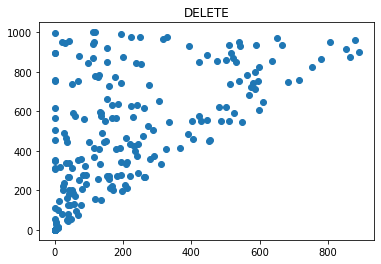

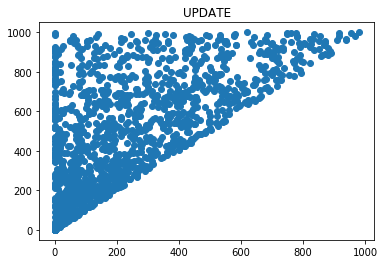

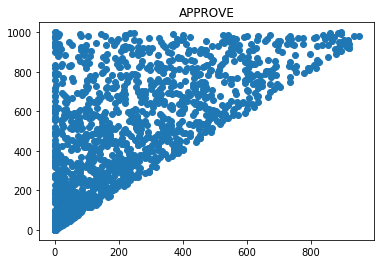

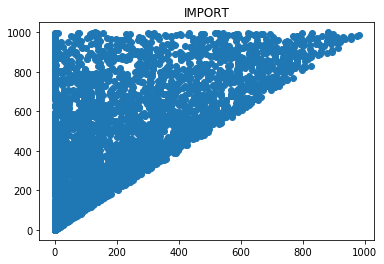

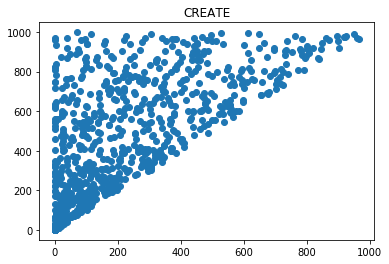

In [11]:
#Зависимость затраченного времени от количества входных данных (диаграмма рассеяния) все кроме SEARCH
for operation in ['DELETE','UPDATE', 'APPROVE', 'IMPORT', 'CREATE']:
    set_of_actionid = set(data['actionId'].loc[data['Operation'] == operation].tolist())
    actions_duration_list = []
    for action in set_of_actionid:
        selected_rows = data[['createdDateTime','Input']].loc[data['actionId'] == action]
        series_of_dates = pd.to_datetime(selected_rows['createdDateTime'])
        action_duration = max(series_of_dates) - min(series_of_dates)
        temp = [action_duration, action, max(selected_rows['Input'])]
        actions_duration_list.append(temp)
    
    action_duration = []
    input_rows = []
    for row in actions_duration_list:
        action_duration.append(row[0].total_seconds())
        input_rows.append(row[2])
    plt.scatter(action_duration, input_rows) 
    plt.title(operation)
    plt.show()
   

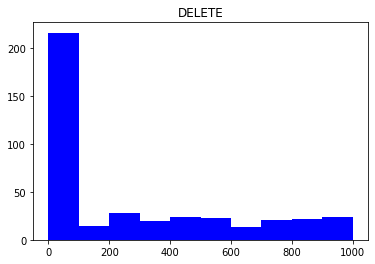

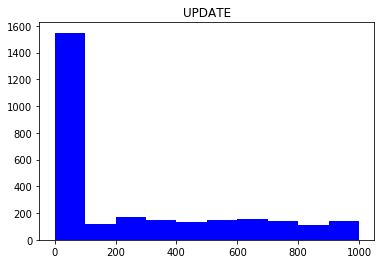

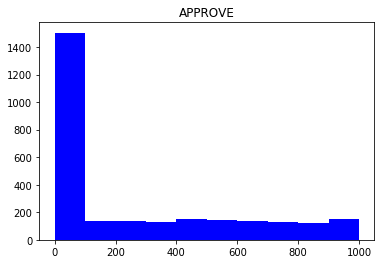

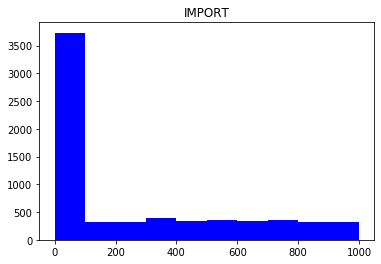

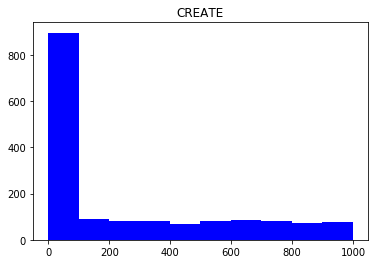

In [9]:
#Гистограмма входных данных по каждой операции все кроме SEARCH
plots = []
for operation in ['DELETE','UPDATE', 'APPROVE', 'IMPORT', 'CREATE']:
    selected_data = data.loc[data['Operation'] == operation]
    input_rows = selected_data['Input'].tolist()
    plt.hist(input_rows,bins=10,facecolor='blue')
    plt.title(operation)
    plt.show()

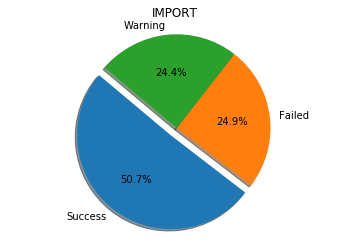

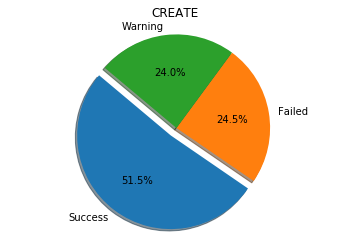

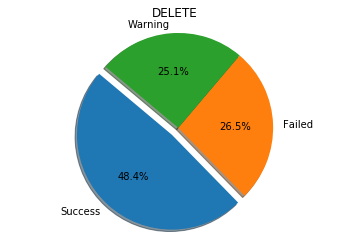

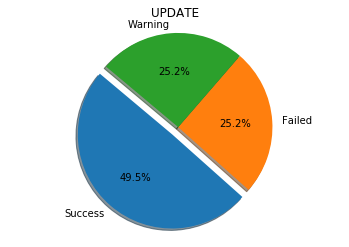

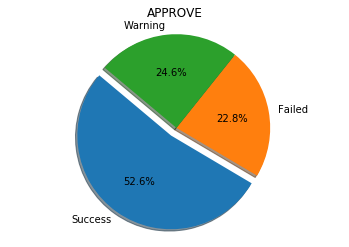

In [10]:
#Диаграмма результатов - отобразить на графике количество успешных, условно успешных (warning) и неуспешных результатов все кроме SEARCH
for operation in ['IMPORT', 'CREATE', 'DELETE','UPDATE', 'APPROVE']:
    selected_data = data.loc[data['Operation'] == operation]
    success_list = sum(selected_data['Success'].tolist())
    failed_list = sum(selected_data['Failed'].tolist())
    warning_list = sum(selected_data['Warning'].tolist())
    labels = ['Success', 'Failed', 'Warning']
    explode = (0.1, 0, 0)
    sizes = [success_list, failed_list, warning_list]
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(operation)
    plt.show()